In [69]:
# Question 4: Ridge Regression Implementation

# Importing required libraries
import numpy as np
import matplotlib.pyplot as plt

In [70]:
# To import the dataset from the dat file
X = np.loadtxt('hw1_ridge_x.dat', delimiter=",")
y = np.loadtxt('hw1_ridge_y.dat', delimiter=",")

# Separate the dataset into training and validation sets
# The first 40 entries of the dataset are required to be set as the training set
# The remaining 10 entries are required to be set as the validation set
# Concatenate their features into matrices vX and tX, and their responses into vectors vY and tY
vX = X[40:]
tX = X[:40]
vY = y[40:]
tY = y[:40]

In [71]:
# Part (a): Implementing Ridge Regression

# Write a function ridge_regression(tX, tY, λ) that takes the training features, 
# training responses, and regularization parameter λ and outputs the exact solution theta 
# for ridge regression.

# Report the resulting value of theta for λ = 0.15.

def ridge_regression(tX, tY, λ):
    n, d = tX.shape
    I = np.eye(d)
    theta = np.linalg.inv( n * λ * I + tX.T @ tX) @ tX.T @ tY
    return theta

theta = ridge_regression(tX, tY, 0.15)
print(f"Theta for λ = 0.15: {theta}")

Theta for λ = 0.15: [-5.55705218e-01  1.15682144e+00 -1.59042086e-03 -1.60716070e+00]


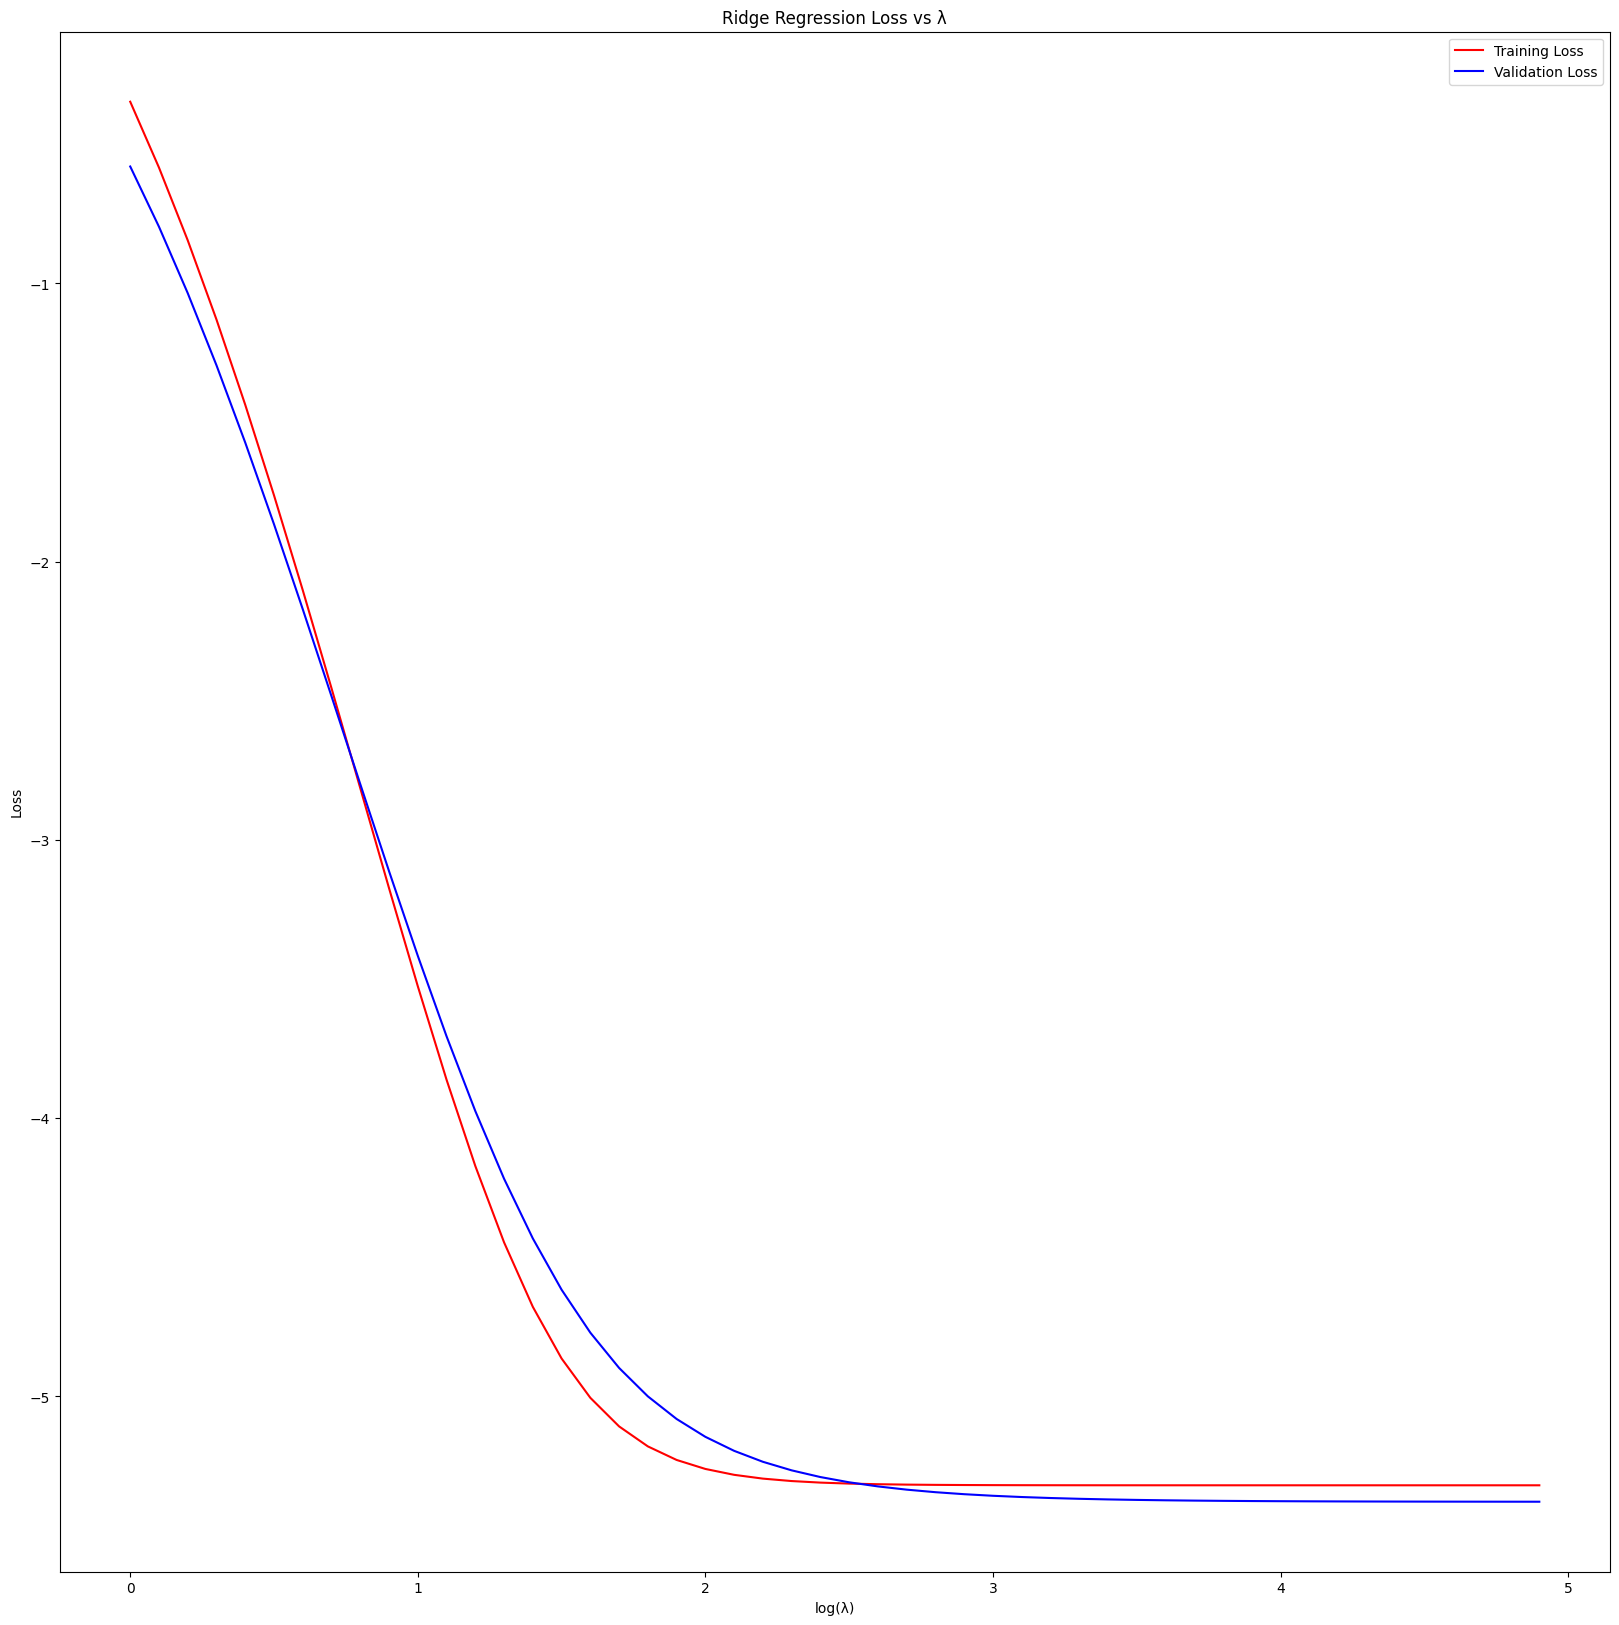

<Figure size 2000x1200 with 0 Axes>

Value of λ that minimizes the validation loss: 4.9


In [72]:
# Part (b): Use the sample code snippet to plot graphs of the validation loss and 
# training loss as λ varies on logrithmic scale from λ = 10^-5 to λ = 10^0. 
# Write down the value of λ that minimizes the validation loss.

tn = tX.shape[0]
vn = vX.shape[0]

tloss = []
vloss = []
index = np.arange(0, 5, 0.1)

for	i in index:
    w =  ridge_regression(tX, tY, 10**-i)
    tloss = tloss + [np.sum((np.dot(tX, w) - tY)**2)/tn/2]
    vloss = vloss + [np.sum((np.dot(vX, w) - vY)**2)/vn/2]
plt.plot(index, np.log(tloss), 'r', label = 'Training Loss')
plt.plot(index, np.log(vloss), 'b', label = 'Validation Loss')
plt.title("Ridge Regression Loss vs λ")
plt.xlabel('log(λ)')
plt.ylabel('Loss')
plt.legend()
plt.figure(figsize=(20, 12))
plt.rcParams["figure.figsize"] = (20, 20)
plt.show()

# Find the value of λ that minimizes the validation loss
min_lambda = index[np.argmin(vloss)]
print(f"Value of λ that minimizes the validation loss: {min_lambda}")